# Segment Shopping Customer
Problem Statment: Understand the target costumers for marketing team to make a strategy

context:The Leader wants you to identufy the most important group based on income,amount of credit and make a ideal number of a group

# Objective Market Segmentation
Divide the customer into approachable groups, Create subsets of a market based on demographics behavioral criteria to better understand the target for marketing activities

# The Approach 
1.perform EDA

2.Use Kmeans clustering algorithm to create segements

3.Use summary statistics on the cluster

4.Then Visualize

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cluster as KMeans
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Marketing_Campaign_Data_A-21492758-f47a-4913-971e-68c9a721311a.csv")

In [3]:
df.head()

,Unnamed: 0,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT_W_CITY,APPL_DATETIME,DATE_BIRTH
0,58785,0,Cash loans,F,Y,Y,157500.0,225000.0,11781.0,225000.0,Secondary / secondary special,House / apartment,0.014520,2,2016-06-11 17:28:54,17-07-1959
1,166116,0,Cash loans,F,N,Y,180000.0,508495.5,21672.0,454500.0,Secondary / secondary special,House / apartment,0.031329,2,2015-05-22 08:42:03,23-06-1951
2,170111,0,Cash loans,F,Y,Y,360000.0,639396.0,47934.0,571500.0,Incomplete higher,House / apartment,0.032561,1,2016-11-26 20:54:07,07-06-1979
3,184247,0,Cash loans,F,N,Y,162000.0,254700.0,14751.0,225000.0,Higher education,House / apartment,0.010147,2,2017-02-20 09:22:06,20-07-1958
4,75886,0,Cash loans,M,Y,Y,225000.0,787131.0,42066.0,679500.0,Higher education,House / apartment,0.025164,2,2017-02-28 09:38:45,05-08-1985


In [4]:
df['SK_ID_CURR'] = df['Unnamed: 0']
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
df1 = df.reindex(['SK_ID_CURR','CODE_GENDER','AMT_INCOME_TOTAL','DATE_BIRTH','AMT_CREDIT','AMT_GOODS_PRICE'], axis=1)

In [6]:
df1

,SK_ID_CURR,CODE_GENDER,AMT_INCOME_TOTAL,DATE_BIRTH,AMT_CREDIT,AMT_GOODS_PRICE
0,58785,F,157500.0,17-07-1959,225000.0,225000.0
1,166116,F,180000.0,23-06-1951,508495.5,454500.0
2,170111,F,360000.0,07-06-1979,639396.0,571500.0
3,184247,F,162000.0,20-07-1958,254700.0,225000.0
4,75886,M,225000.0,05-08-1985,787131.0,679500.0
...,...,...,...,...,...,...
30717,183150,F,112500.0,06-02-1953,275040.0,180000.0
30718,192611,F,112500.0,14-06-1984,553500.0,553500.0
30719,50975,F,225000.0,09-10-1980,254700.0,225000.0
30720,71489,F,315000.0,13-12-1964,1762110.0,1575000.0


In [7]:
df1['DATE_BIRTH'] = pd.to_datetime(df1['DATE_BIRTH'])

In [8]:
df1['mths_age'] = round(pd.to_numeric((pd.to_datetime('2022-07-19') - df1['DATE_BIRTH']) / np.timedelta64(1, 'M'))) 
df1['mths_age'].head(3)

0    756.0
1    853.0
2    516.0
Name: mths_age, dtype: float64

In [9]:
df1['age']= df1['mths_age']/12
df1["age"] = df1["age"].astype("int")
df1.head(3)

,SK_ID_CURR,CODE_GENDER,AMT_INCOME_TOTAL,DATE_BIRTH,AMT_CREDIT,AMT_GOODS_PRICE,mths_age,age
0,58785,F,157500.0,1959-07-17,225000.0,225000.0,756.0,63
1,166116,F,180000.0,1951-06-23,508495.5,454500.0,853.0,71
2,170111,F,360000.0,1979-07-06,639396.0,571500.0,516.0,43


In [10]:
df1 = df1.drop(['mths_age','DATE_BIRTH'], axis=1)

In [11]:
df1

,SK_ID_CURR,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,age
0,58785,F,157500.0,225000.0,225000.0,63
1,166116,F,180000.0,508495.5,454500.0,71
2,170111,F,360000.0,639396.0,571500.0,43
3,184247,F,162000.0,254700.0,225000.0,64
4,75886,M,225000.0,787131.0,679500.0,37
...,...,...,...,...,...,...
30717,183150,F,112500.0,275040.0,180000.0,69
30718,192611,F,112500.0,553500.0,553500.0,38
30719,50975,F,225000.0,254700.0,225000.0,41
30720,71489,F,315000.0,1762110.0,1575000.0,57


# Univariate Analysis

In [12]:
df1['AMT_INCOME_TOTAL'].mean()

168584.9094541371

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30722 entries, 0 to 30721
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SK_ID_CURR        30722 non-null  int64  
 1   CODE_GENDER       30722 non-null  object 
 2   AMT_INCOME_TOTAL  30722 non-null  float64
 3   AMT_CREDIT        30722 non-null  float64
 4   AMT_GOODS_PRICE   30722 non-null  float64
 5   age               30722 non-null  int32  
dtypes: float64(3), int32(1), int64(1), object(1)
memory usage: 1.3+ MB


In [14]:
df1.describe()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,age
count,30722.000000,3.072200e+04,3.072200e+04,3.072200e+04,30722.000000
mean,120718.282306,1.685849e+05,6.009695e+05,5.397866e+05,52.722381
std,44253.455638,1.120500e+05,4.041101e+05,3.707125e+05,14.707321
min,43602.000000,2.610000e+04,4.500000e+04,4.500000e+04,24.000000
25%,82412.500000,1.125000e+05,2.700000e+05,2.385000e+05,39.000000
50%,121038.000000,1.485000e+05,5.135310e+05,4.500000e+05,57.000000
75%,159091.000000,2.025000e+05,8.086500e+05,6.795000e+05,65.000000
max,197338.000000,9.000000e+06,3.375000e+06,3.375000e+06,75.000000


In [15]:
df1['AMT_CREDIT']= df1['AMT_CREDIT']/10
df1['AMT_GOODS_PRICE']= df1['AMT_GOODS_PRICE']/10
df1['AMT_INCOME_TOTAL']=df1['AMT_INCOME_TOTAL'].astype('int')
df1['AMT_CREDIT']=df1['AMT_CREDIT'].astype('int')
df1['AMT_GOODS_PRICE']=df1['AMT_GOODS_PRICE'].astype('int')

In [16]:
df1['AMT_INCOME_TOTAL'] = df1['AMT_INCOME_TOTAL'].replace(9000000,168584)

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

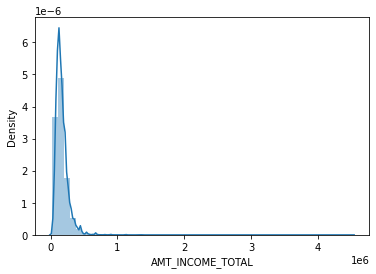

In [17]:
sns.distplot(df1['AMT_INCOME_TOTAL'])

In [18]:
df1.columns

Index(['SK_ID_CURR', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_GOODS_PRICE', 'age'],
      dtype='object')

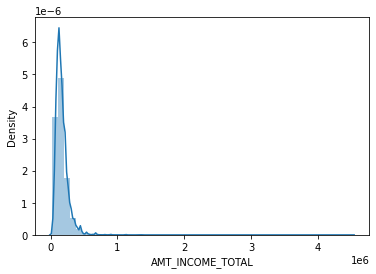

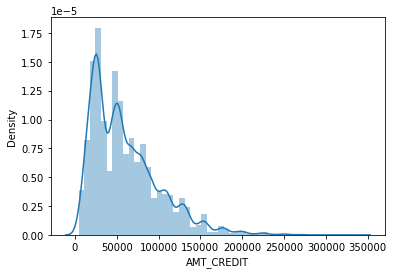

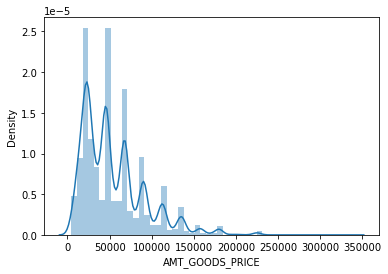

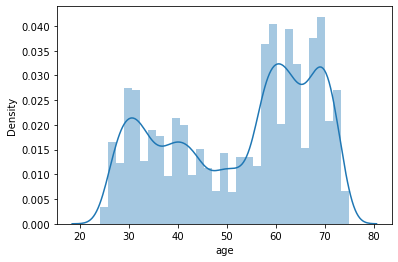

In [19]:
columns = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE', 'age']
for i in columns:
    plt.figure()
    sns.distplot(df1[i])

As we can see in income total still to many outliers we gonna remove it with IQR

In [20]:
#define fungsi Outliers
#IQR = Q3-Q1
#+-1.5
def outliers(df1, ft):
    Q1 = df1[ft].quantile(0.25)
    Q3 = df1[ft].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #list dibuat untuk menyimpan index dari outliers
    ls = df1.index[ (df1[ft] < lower_bound) | (df1[ft] > upper_bound)]
    return ls

In [21]:
#membuat daftar kosong untuk  menyimpan index keluaran dari multiple column
index_list =[]
#ekstrak outlier untuk semua kolom digunaka for loop

for feature in ['AMT_INCOME_TOTAL', 'age','AMT_CREDIT','AMT_GOODS_PRICE']:
    index_list.extend(outliers(df1, feature))

In [22]:
def remove_outlier(df1, ls):
    ls = sorted(set(ls))
    df1 = df1.drop(ls)
    return df1

In [23]:
df1 = remove_outlier(df1, index_list)

In [24]:
df1

,SK_ID_CURR,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,age
0,58785,F,157500,22500,22500,63
1,166116,F,180000,50849,45450,71
3,184247,F,162000,25470,22500,64
4,75886,M,225000,78713,67950,37
6,61043,F,157500,23985,22500,50
...,...,...,...,...,...,...
30716,97739,F,103500,43603,36000,71
30717,183150,F,112500,27504,18000,69
30718,192611,F,112500,55350,55350,38
30719,50975,F,225000,25470,22500,41


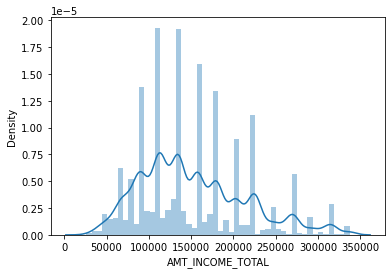

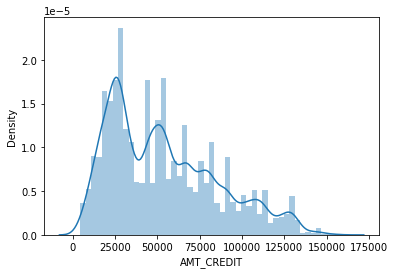

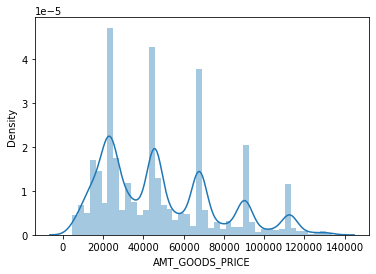

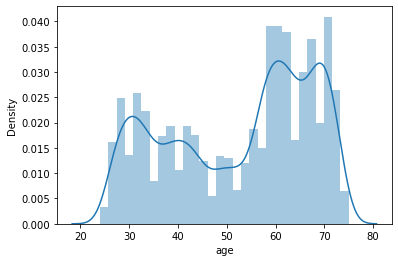

In [25]:
columns = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE', 'age']
for i in columns:
    plt.figure()
    sns.distplot(df1[i])

Now, Our Value in feature is clean

# Continued Univariate Analysis

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

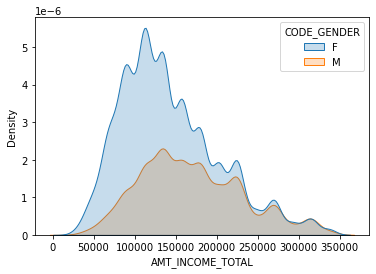

In [26]:
sns.kdeplot(df1['AMT_INCOME_TOTAL'],shade=True, hue=df1['CODE_GENDER'])

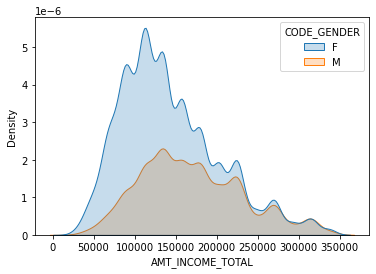

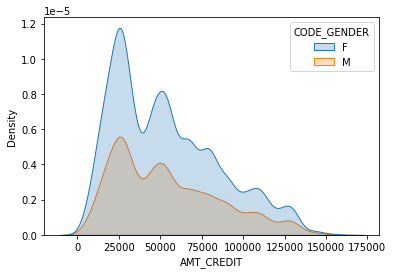

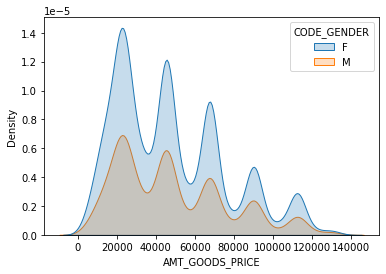

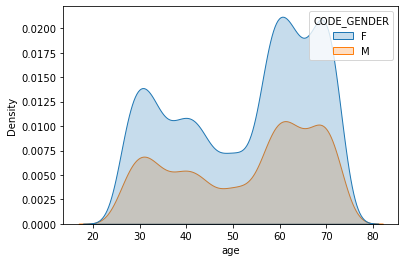

In [27]:
columns = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE', 'age']
for i in columns:
    plt.figure()
    sns.kdeplot(df1[i],shade=True, hue=df1['CODE_GENDER'])

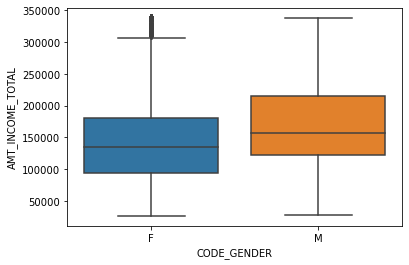

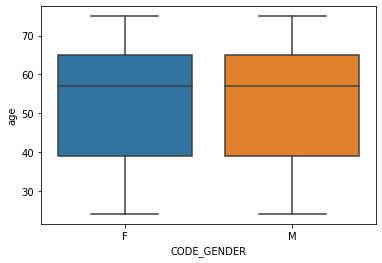

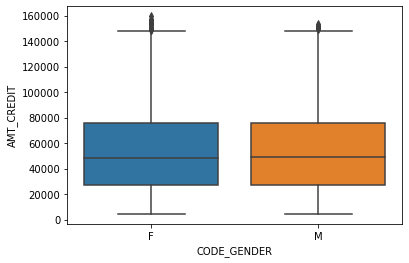

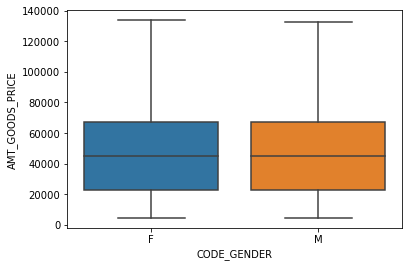

In [28]:
#melihat perbandingan secara numerical
columns = ['AMT_INCOME_TOTAL','age','AMT_CREDIT','AMT_GOODS_PRICE']
for i in columns:
    plt.figure()
    sns.boxplot(data=df1,x='CODE_GENDER', y=df1[i])

In [29]:
df1['CODE_GENDER'].value_counts(normalize=True)

F    0.667022
M    0.332978
Name: CODE_GENDER, dtype: float64

# Bivariate Analysis

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='AMT_CREDIT'>

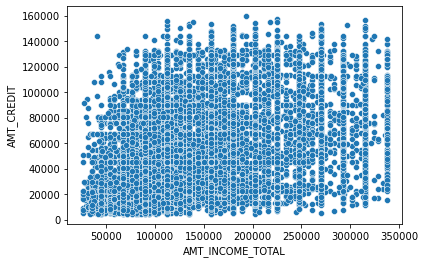

In [30]:
sns.scatterplot(data=df1,x='AMT_INCOME_TOTAL',y='AMT_CREDIT')

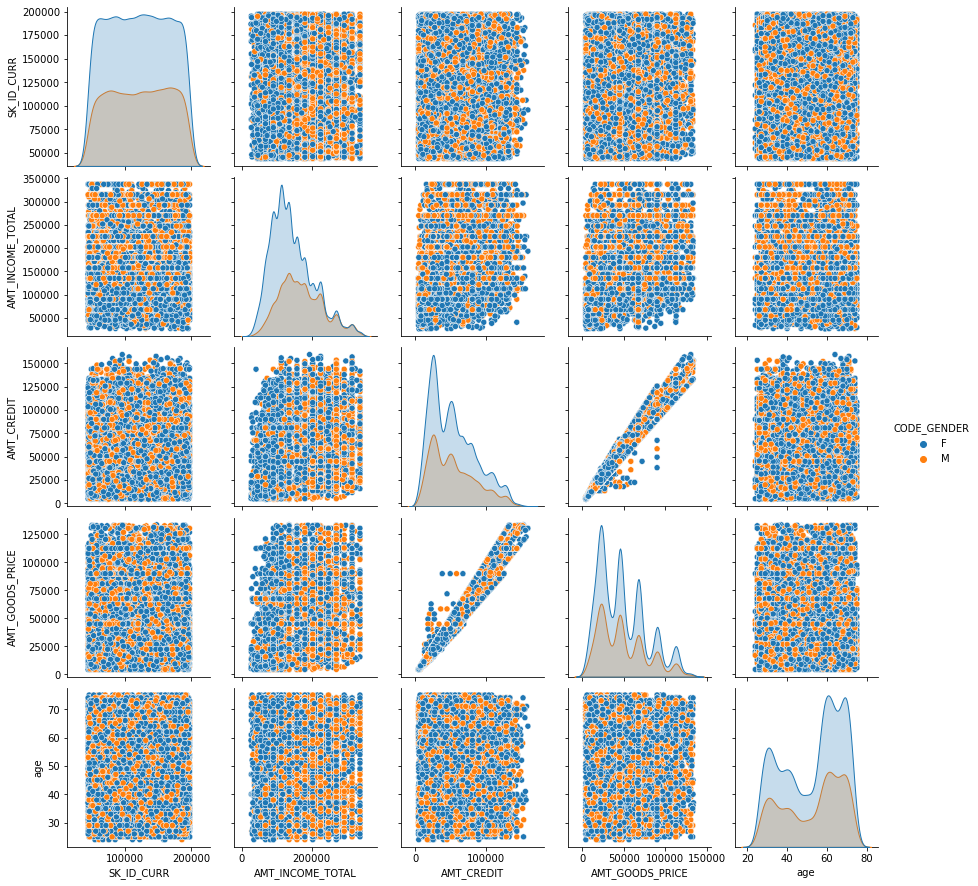

In [31]:
sns.pairplot(df1, hue='CODE_GENDER')

In [32]:
df1.groupby(['CODE_GENDER'])['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE','age'].mean()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,age
CODE_GENDER,,,,
F,142844.969766,53462.276901,47656.709715,52.746134
M,169896.663106,54038.834223,48230.276223,52.717261


In [33]:
df1.columns

Index(['SK_ID_CURR', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_GOODS_PRICE', 'age'],
      dtype='object')

In [34]:
df1.corr()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,age
SK_ID_CURR,1.000000,-0.000279,0.007221,0.006465,0.000859
AMT_INCOME_TOTAL,-0.000279,1.000000,0.341005,0.347113,-0.003920
AMT_CREDIT,0.007221,0.341005,1.000000,0.981579,0.000593
AMT_GOODS_PRICE,0.006465,0.347113,0.981579,1.000000,0.000218
age,0.000859,-0.003920,0.000593,0.000218,1.000000


<AxesSubplot:>

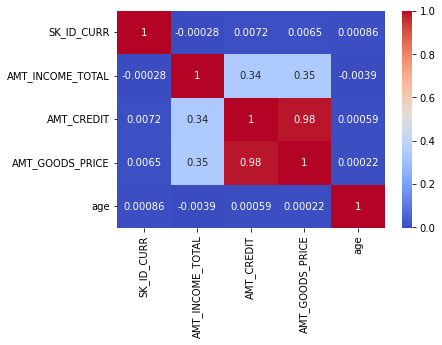

In [35]:
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm')

# CLUSTERING 1

In [36]:
from sklearn.cluster import KMeans
clustering1 = KMeans(n_clusters=4)

In [37]:
clustering1.fit(df1[['AMT_INCOME_TOTAL']])

KMeans(n_clusters=4)

In [38]:
clustering1.labels_

array([3, 0, 3, ..., 3, 0, 1])

In [39]:
df1['Income_Cluster']=clustering1.labels_
df1.head()

,SK_ID_CURR,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,age,Income_Cluster
0,58785,F,157500,22500,22500,63,3
1,166116,F,180000,50849,45450,71,0
3,184247,F,162000,25470,22500,64,3
4,75886,M,225000,78713,67950,37,0
6,61043,F,157500,23985,22500,50,3


In [40]:
df1.Income_Cluster.value_counts()

3    11505
0     7208
1     6648
2     2755
Name: Income_Cluster, dtype: int64

In [41]:
clustering1.inertia_

10141939733413.28

In [42]:
intertia_score=[]

Innertia is represents distance between centeroid  

In [43]:
#loop to find out the elbow meter
for i in range (1,11):
    kmeans1 = KMeans(n_clusters = i)
    kmeans1.fit(df1[['AMT_INCOME_TOTAL']])
    intertia_score.append(kmeans1.inertia_)

In [44]:
intertia_score

[111118986234315.03,
 35499766339174.45,
 17925881500084.805,
 10138911200586.943,
 5852254690978.797,
 4494280402731.979,
 3323206510317.836,
 2301657139621.082,
 1568768356068.6626,
 1108858182485.9697]

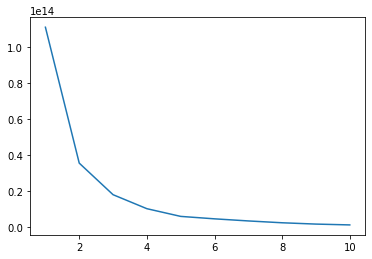

In [45]:
plt.plot(range(1,11),intertia_score)

In [46]:
from sklearn.cluster import KMeans
clustering2 = KMeans(n_clusters=4)

In [47]:
clustering2.fit(df1[['AMT_INCOME_TOTAL','AMT_CREDIT']])

KMeans(n_clusters=4)

In [48]:
df1['Income and Credit']=clustering2.labels_
df1.head()

,SK_ID_CURR,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,age,Income_Cluster,Income and Credit
0,58785,F,157500,22500,22500,63,3,0
1,166116,F,180000,50849,45450,71,0,0
3,184247,F,162000,25470,22500,64,3,0
4,75886,M,225000,78713,67950,37,0,1
6,61043,F,157500,23985,22500,50,3,0


In [49]:
#Membuat centeroid dari cluster pada Kmeans
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']
centers

,x,y
0,159762.055964,37601.221702
1,251628.228967,69752.489299
2,90520.162443,35852.197569
3,150312.704715,95374.662475


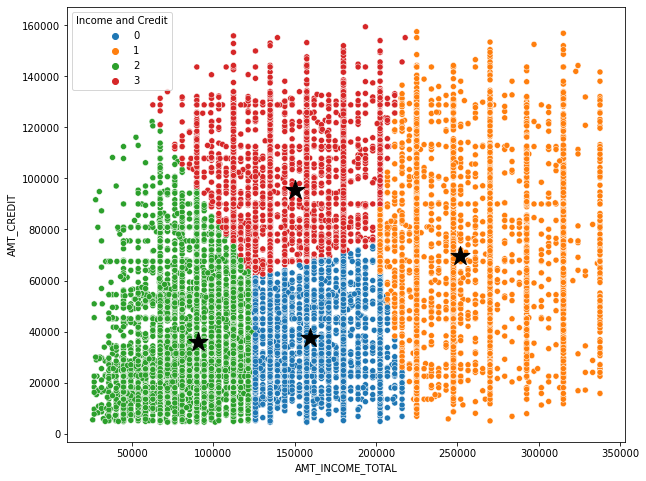

In [50]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df1, x='AMT_INCOME_TOTAL', y='AMT_CREDIT',hue='Income and Credit', palette='tab10')
plt.scatter(x=centers['x'], y=centers['y'], s =400, c='black',marker='*')

In [51]:
pd.crosstab(df1['Income and Credit'], df1['CODE_GENDER'], normalize='index')

CODE_GENDER,F,M
Income and Credit,,
0,0.604583,0.395417
1,0.537313,0.462687
2,0.779233,0.220767
3,0.688396,0.311604


# Results
we can see from the table above theres a 4 cluster that we made, so for the first cluster [0], gender female have 59,8% and for the Male is 40,2%

# Second way to Clustering

# Split the Data

In [52]:
df1.columns

Index(['SK_ID_CURR', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_GOODS_PRICE', 'age', 'Income_Cluster', 'Income and Credit'],
      dtype='object')

In [53]:
#mensplit data dan hanya mengambil di column 3 & 4 ( AMT INCOME & AMT_CREDIT_GOODS)
x = df1.iloc[:, [2,3]].values
y = df1.iloc[:, [2,3]].values

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [56]:
x_test.shape

(5624, 2)

In [57]:
#wcss adalah ukuran variabilitas pengamatan dalam setiap cluster. Secara umum, cluster yang memiliki jumlah kuadrat kecil lebih kompak daripada cluster yang memiliki jumlah kuadrat besar.
#wcss(within cluster sum square )
wcss = []

In [58]:
from sklearn.cluster import KMeans
#loop to find out the elbow meter
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init ='k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

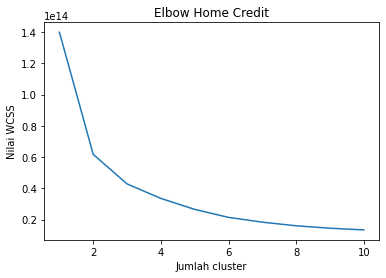

In [59]:
#doing a elbow method
plt.plot(range(1,11), wcss)
plt.title('Elbow Home Credit')
plt.xlabel('Jumlah cluster')
plt.ylabel('Nilai WCSS')
plt.show()

# The optimal from total cluster is 4

In [60]:
kmeanmodel = KMeans(n_clusters = 4, init = 'k-means++', random_state=0)

In [61]:
y_kmeans = kmeanmodel.fit_predict(x_test)

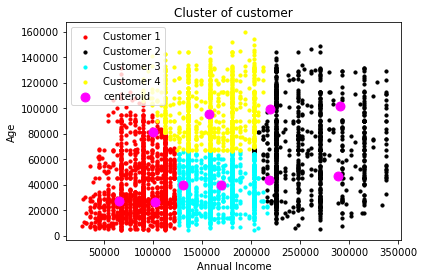

In [62]:
plt.scatter(x_test[y_kmeans== 0,0], x_test[y_kmeans== 0,1], s = 10, c ='red', label ='Customer 1')
plt.scatter(x_test[y_kmeans== 1,0], x_test[y_kmeans== 1,1], s = 10, c ='black', label ='Customer 2')
plt.scatter(x_test[y_kmeans== 2,0], x_test[y_kmeans== 2,1], s = 10, c ='cyan', label ='Customer 3')
plt.scatter(x_test[y_kmeans== 3,0], x_test[y_kmeans== 3,1], s = 10, c ='yellow', label ='Customer 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s= 80, c = 'magenta', label ='centeroid')
plt.title('Cluster of customer')
plt.xlabel('Annual Income')
plt.ylabel('Age')
plt.legend()
plt.show()

# RESULT
In second way thers so many centeroid we got there's 10 centeroid 